# 2. 그래프와 시각화

## 기본 설정

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

## matplotlib.pyplot의 시각화 도구 API

### `matplotlib.pyplot.plot()`
- 2차원 그래프를 그리는 함수이다.
- y축 좌표들의 리스트 또는 어레이만 인자로 넣어줄 때이다. x축 좌표는 해당 값들의 인덱스로 사용됨
- [참고](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

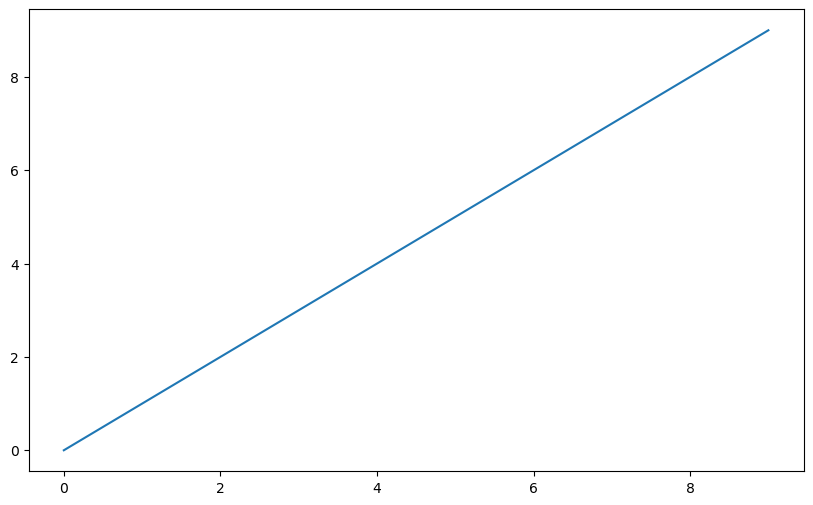

In [4]:
data = np.arange(10)
plt.plot(data)#  y축에 data가 입력되고 x축에는 index가 사용된다.

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `Figure` 객체와 서브플롯(subplot)

- 모든 그래프는 `Figure` 객체 내에 존재
- `matplotlib.pyplot.figure()` 함수에 의해 생성
- 그래프 여러개 그리고 싶으면 Figure 안에 여러개 넣으면 된다.

__참고:__ 
- 주피터 노트북을 사용시  `matplotlib.pyplot.figure()`, `matplotlib.pyplot.add_subplot()` 등 그래프를 그래프화 관련된 함수들은 모두 같은 셀에서 실행되어야 한다. 

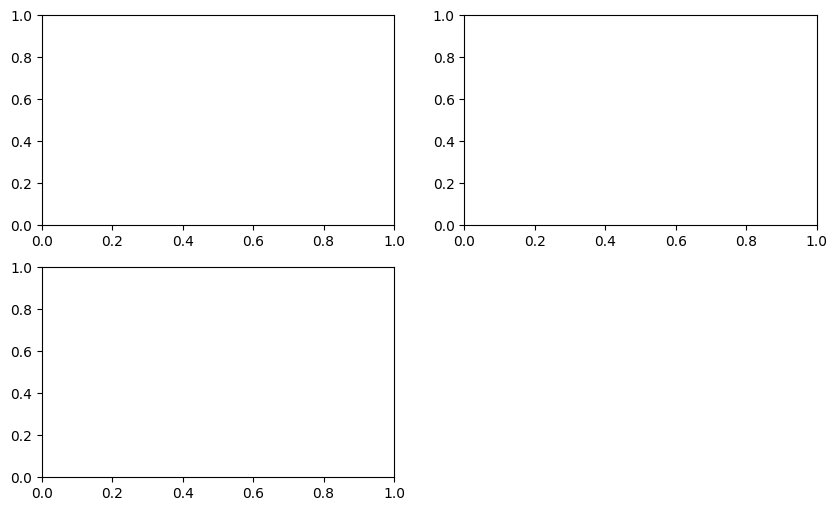

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 4개의 플롯중 하나가 그려진거임
ax1 = fig.add_subplot(2,2,2)
ax1 = fig.add_subplot(2,2,3)

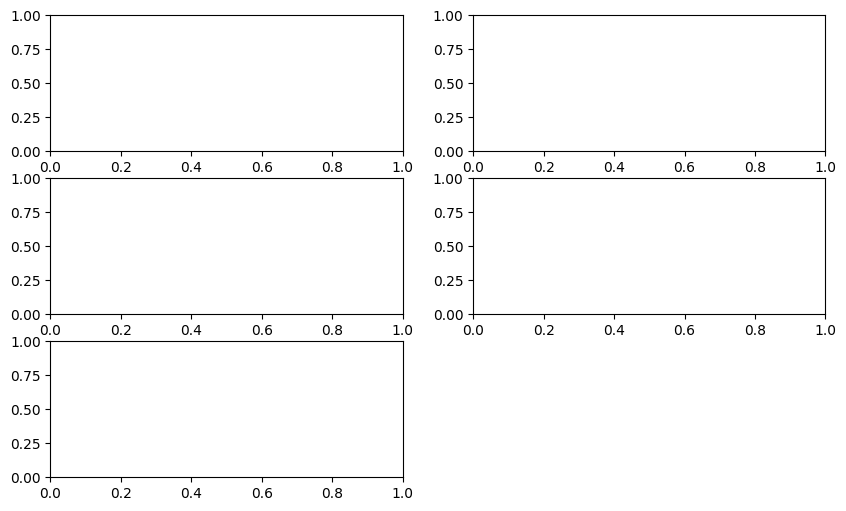

In [7]:
# 3바이 2를 만든다음에 5개의 그래프를 그려보세용
fig = plt.figure() # 얘가 객체
ax1 = fig.add_subplot(3,2,1) #subplot인거임
ax1 = fig.add_subplot(3,2,2)
ax1 = fig.add_subplot(3,2,3)
ax1 = fig.add_subplot(3,2,4)
ax1 = fig.add_subplot(3,2,5)

- 서브플롯(subplot)
    - `Figure` 객체 내에 그래프를 그리기 위해 서브플롯(subplot)을 지정
    - `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 만들어 보자

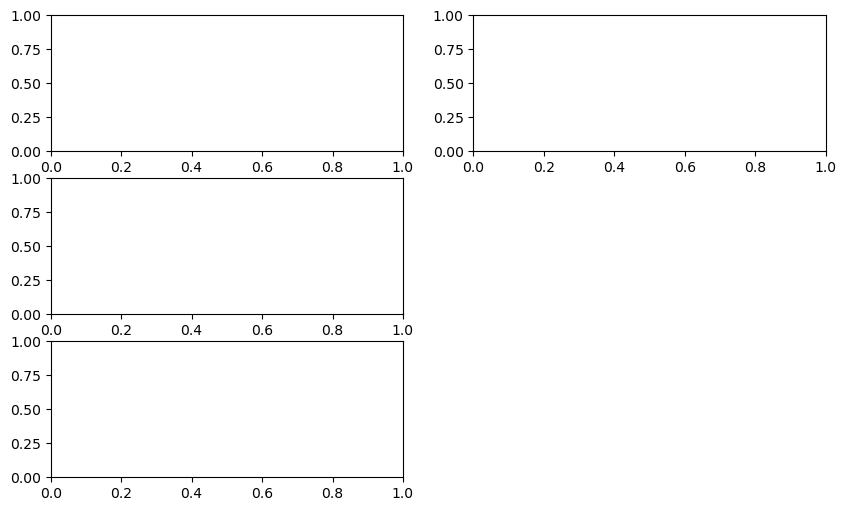

In [6]:
# 3x2 를 만들고 5개의 빈 subplot을 만들어 보세요

fig = plt.figure()
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax3 = fig.add_subplot(3, 2, 5)


- subplot 추가

#### 그래프 삽입
- `matplotlib.pyplot.plot()`
- `<object>.plot()`

##### 방법 1: `matplotlib.pyplot.plot()`

- 마지막에 선언된 서브플롯에 그래프를 그린다.
- 예) 누적합을 나타내는 그래프를 그려보자

In [8]:
data = np.random.randn(50).cumsum() #누적합
data


array([-0.2047,  0.2742, -0.2452, -0.8009,  1.1648,  2.5583,  2.6512,
        2.9329,  3.7019,  4.9484,  5.9556,  4.6593,  4.9343,  5.1632,
        6.5162,  7.4026,  5.4009,  5.0291,  6.6981,  6.2596,  5.7198,
        6.1968,  9.4457,  8.4245,  7.8474,  7.9716,  8.2742,  8.7979,
        8.7989, 10.1427,  9.4291,  8.598 ,  6.2278,  4.367 ,  3.5062,
        4.0664,  2.8005,  2.9203,  1.8568,  2.1896, -0.1698, -0.3693,
       -1.9113, -2.882 , -4.1891, -3.9027, -3.5247, -4.2786, -3.9473,
       -2.5976])

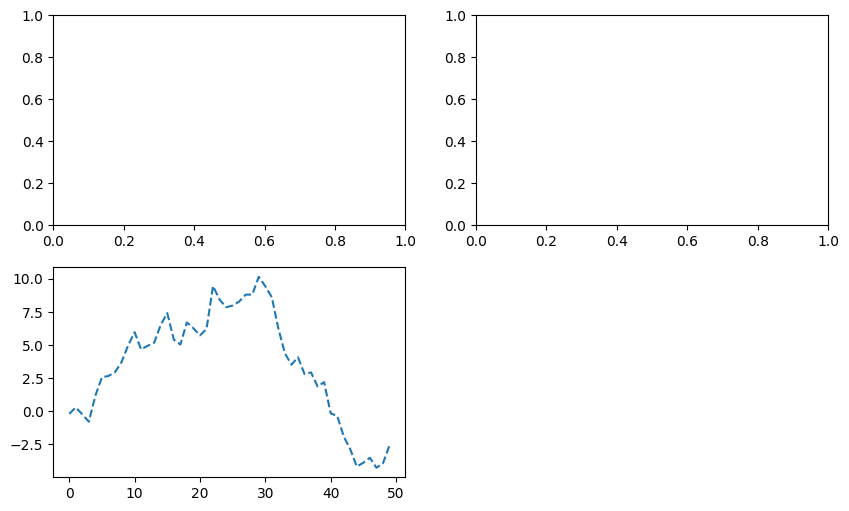

In [10]:

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 4개의 플롯중 하나가 그려진거임
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(data, "--") #위쪽에는 안그려지고 가장 마지막에 있는 애들만 적용이된다.

##### 방식 2: `객체명.plot()` 함수 활용

- 특정 서브플롯에 그래프를 삽입하려면 객체 이름과 함께 `plot()` 함수 등을 호출

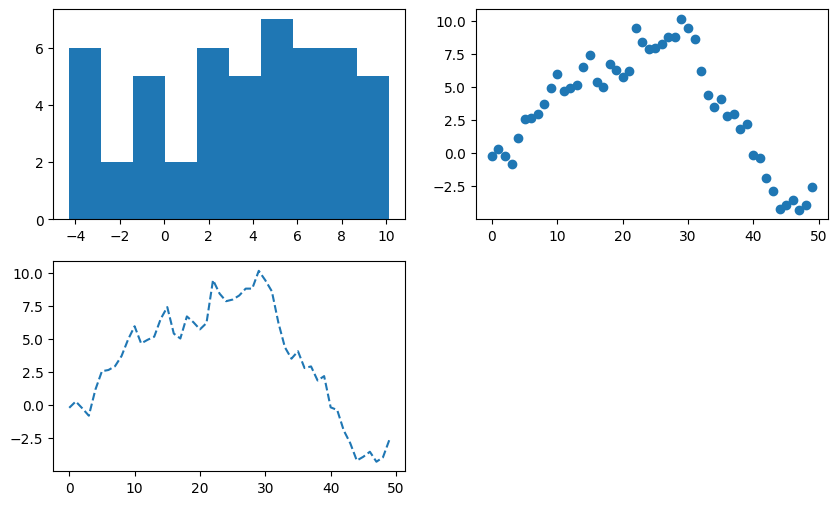

In [17]:

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 4개의 플롯중 하나가 그려진거임
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(data, "--") #가장 마지막에 만들어지는 것
#ax1에 할당되어 만들어진다.
ax1.hist(data, bins=10) # 이 변수에 내가 그려도 그려질거야! 

#변수에 할당했지만 ax2에 만들어진다.
_=ax2.scatter(np.arange(len(data)), data) #변수에 할당되어도 그려진다.

#### 서브플롯 관리

- `matplotlib.pyplot.subplots()`
    - 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.

- 예) 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성.

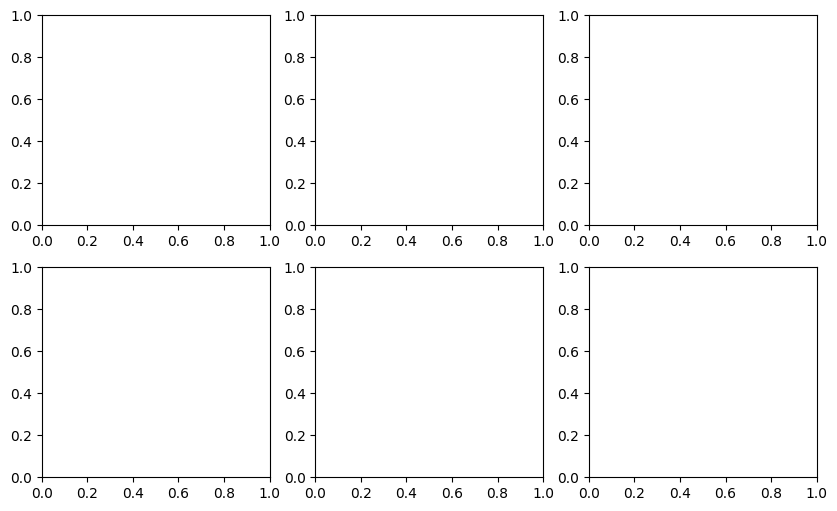

In [20]:
fig, axes = plt.subplots(2,3) #이렇게 할당이 된다.

- `plt.subplots_adjust()` 
    - 각 서브플롯 사이의 여백을 조절
    - 여백의 크기는 그래프의 크기와 숫자에 의존한다.

- 예) 여백이 0인 경우

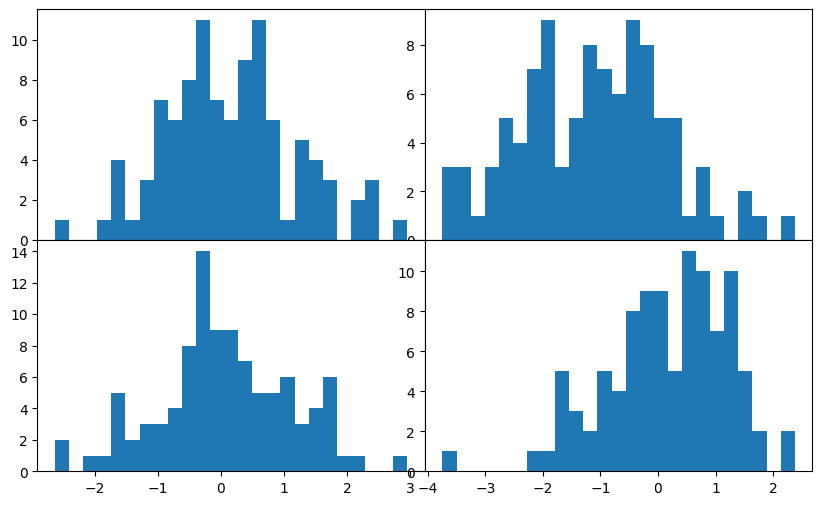

In [24]:
#일반적으로는 반복문으로 많이 그린다.
fig, axes = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(100), bins=25)


# 여백을 알아서 조절
plt.subplots_adjust(wspace=0, hspace=0) # 상하좌우 여백을 0으로 만드려면 일케 써준다.

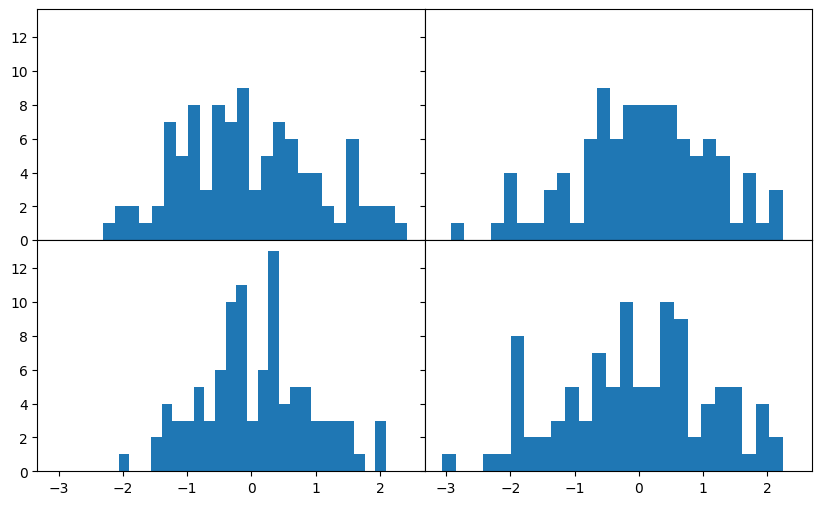

In [25]:
#일반적으로는 반복문으로 많이 그린다.
fig, axes = plt.subplots(2,2,sharey=True, sharex = True) #y축을 공유한다.

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(100), bins=25)


# 여백을 알아서 조절
plt.subplots_adjust(wspace=0, hspace=0) # 상하좌우 여백을 0으로 만드려면 일케 써준다.

- 예) 여백이 1인 경우

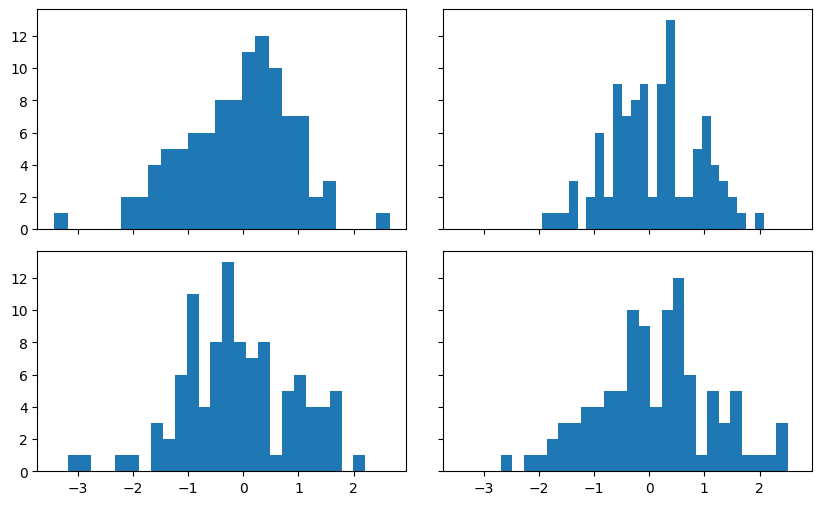

In [26]:
#일반적으로는 반복문으로 많이 그린다.
fig, axes = plt.subplots(2,2,sharey=True, sharex = True) #y축을 공유한다.

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(100), bins=25)


# 여백을 알아서 조절
plt.subplots_adjust(wspace=0.1, hspace=0.1) #간격 조절 가능 0.1 이런식으로!

### 색상, 마커, 선 스타일

- 그래프의 속성을 변경하면 스타일이 변경된다.
- 방법 1: 문자열 방식

```python
ax.plot(x, y, 'g--')
```

- 방법 2: 키워드 인자 지정 방식

```python
ax.plot(x, y, linestyle='--', color='g')
```

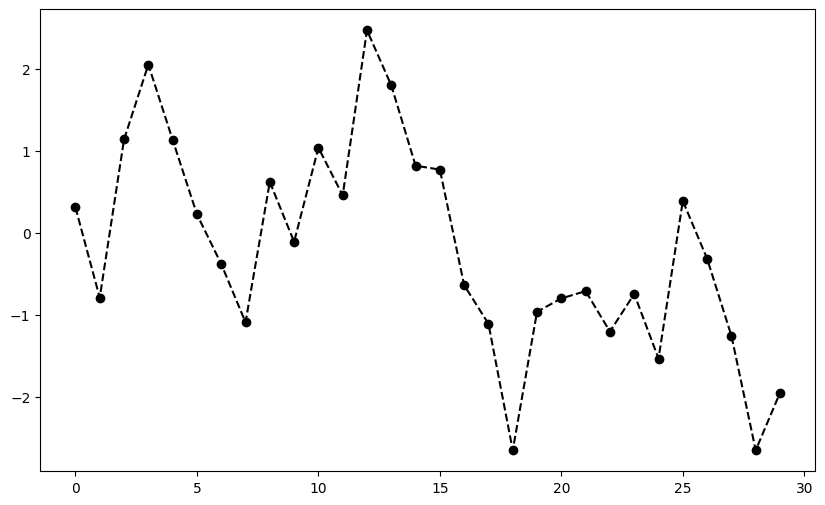

In [30]:
plt.plot(np.random.randn(30).cumsum(),"ko--") # k 색상 o는 그래프 점?

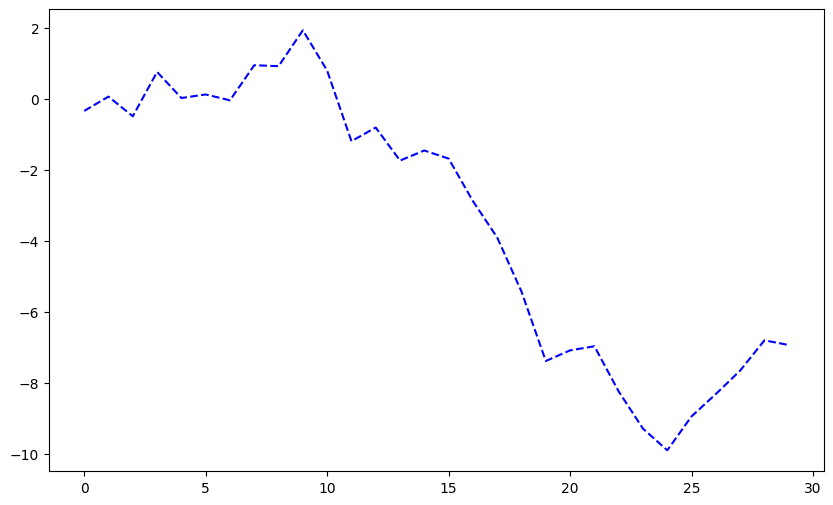

In [31]:
plt.plot(np.random.randn(30).cumsum(),color="b",linestyle="dashed",marker="")

색상은 RGB 값을 HEX 코드를 이용하여 직접 사용 가능
- [RGB HEX 코드 link](https://www.w3schools.com/colors/colors_rgb.asp)

#### 여러 그래프 하나의 서브플롯에 그리기

- 여러 스타일의 그래프를 하나의 서브플롯에 그려 다양한 정보를 동시에 전달

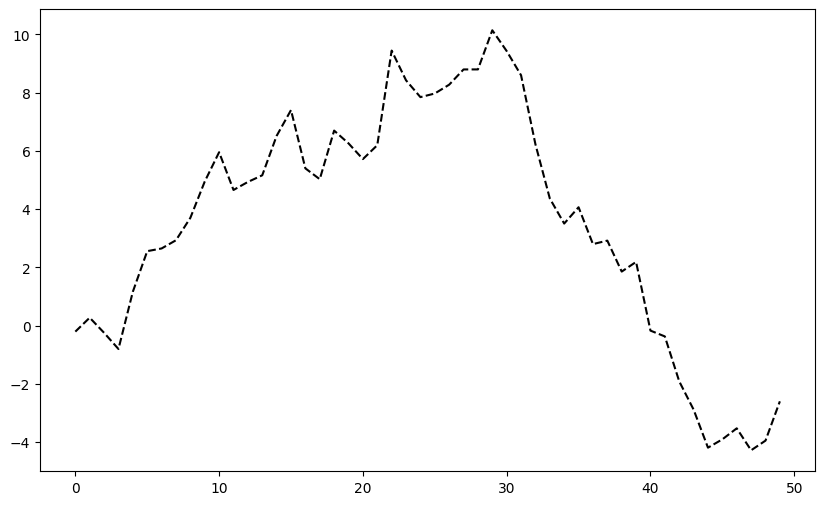

In [33]:
plt.plot(data, "k--")

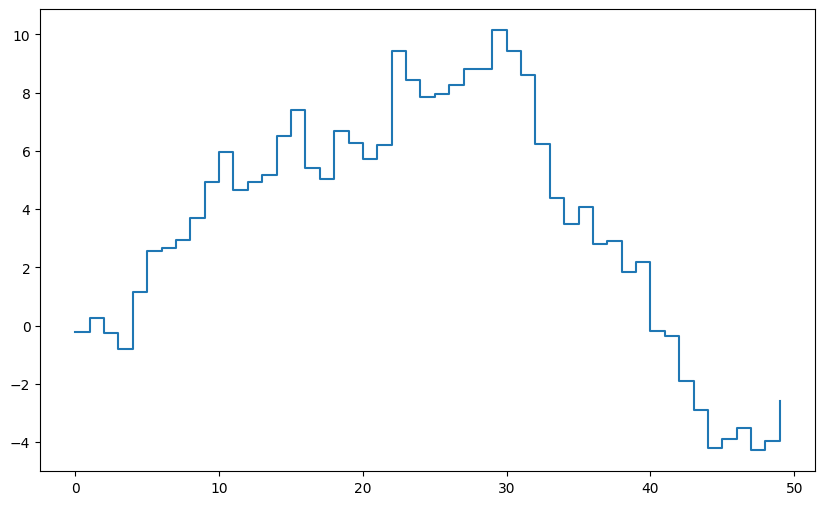

In [36]:
plt.plot(data, drawstyle="steps-post") #계단식으로 그려줌

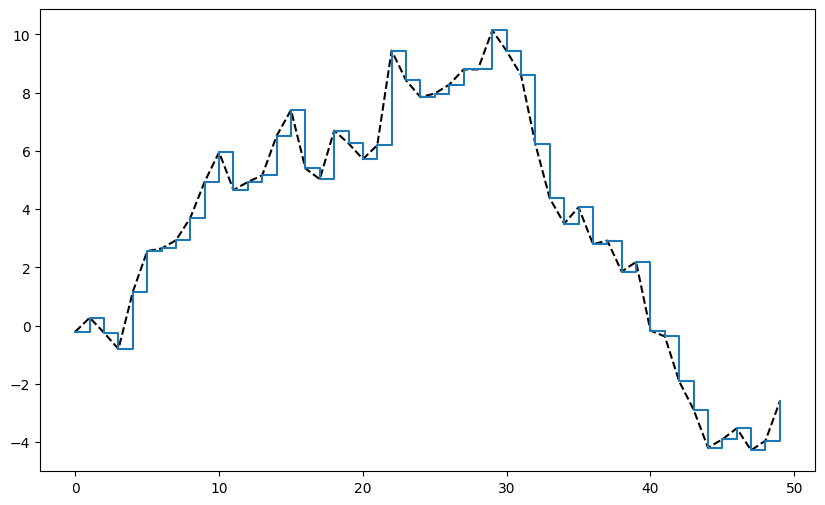

In [37]:
# 위에 두개를 동시에 나타내려면...
plt.plot(data, "k--")
plt.plot(data, drawstyle="steps-post")

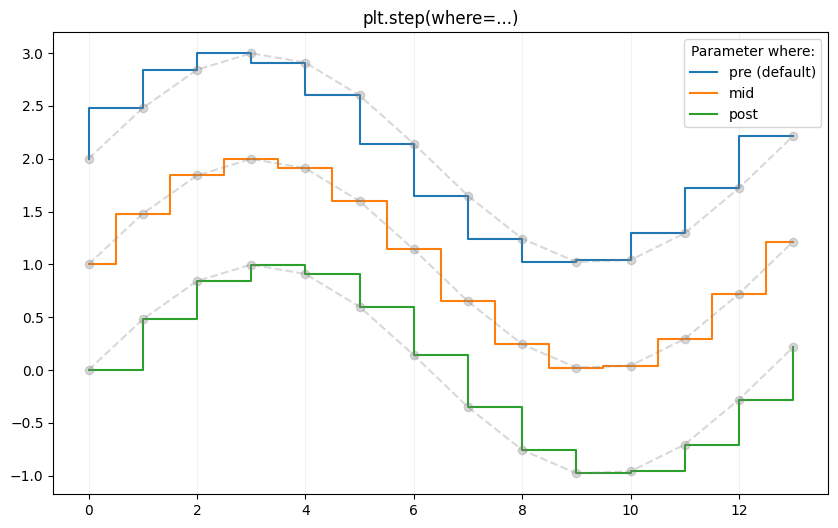

In [38]:
x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

- 범례 표기
    - `plt.legend()` 
    - `loc='best'`: 범례 위지 지정. 기본값은 auto

### 눈금과 라벨

#### 이미지 타이틀, 축 이름, 눈금, 눈금 이름 지정

##### 방법 1: 파이플롯 객체의 메서드 활용
- `set_xticks()` 함수: 눈금 지정
- `set_xticklabels()` 함수: 눈금 라벨 지정
- `set_title()` 함수: 그래프 타이틀 지정
- `set_xlabel()` 함수: x축 이름 지정

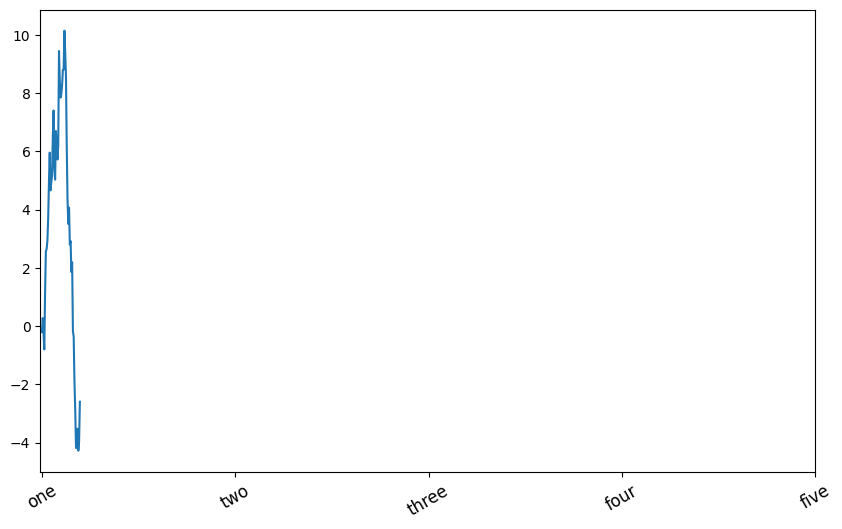

In [46]:
fig = plt.figure() #figure객체 만들기
ax = fig.add_subplot(1,1,1)
ax.plot(data)

# 눈금지정
ticks = ax.set_xticks([0,250,500,750,1000])

#눈금 라벨 달아주기
#ticks를 만들어주고 달면 ticks 기준으로 달린다.
labels = ax.set_xticklabels(["one","two","three","four","five"],
                            rotation=30, fontsize="large") #rotation하면 30도 돌아간다는데 뭔 말인지 몰겠네 다시 봐보기

##### 방법 2: pyplot 모듈의 함수 활용
- `plt.xticks()` 함수: 눈금 및 눈금 라벨 지정
- `plt.title()` 함수: 그래프 타이틀 지정
- `plt.xlabel()` 함수: x축 이름 지정

Text(0.5, 0, 'xindex')

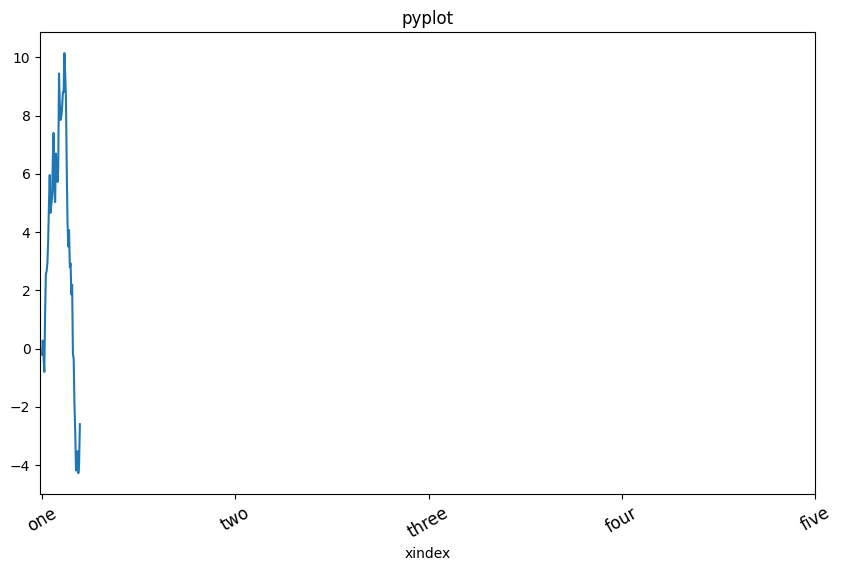

In [48]:
# plt 라는 모듈을 이용해서 달아줄 수 있음
# 그래프를 여러개 그릴때 객체정보로 그릴 때가 편하고 (위에 방법)
# 한개만 그릴때 그리는건 plt메소드를 이용해야 편함

fig = plt.figure() #figure객체 만들기
ax = fig.add_subplot(1,1,1)
ax.plot(data)

# 눈금지정
plt.xticks([0,250,500,750,1000], ["one","two","three","four","five"],
                            rotation=30, fontsize="large")

plt.title("pyplot")
plt.xlabel("xindex")

### 서브플롯에 주석 및 도형 추가하기

#### 주석 추가

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [7]:
spx_path = "https://raw.githubusercontent.com/myoh0623/dataset/main/spx.csv"

In [8]:
data = pd.read_csv(spx_path, index_col=0, parse_dates=True)
data

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


시간 컬럼을 행의 인덱스로 사용하자

- `index_col=0`: 0번 열(column)을 인덱스로 사용
- `parse_dates=True`: 년월일까지만 구분해서 인덱스로 사용. 기본값은 `False`.

<Axes: >

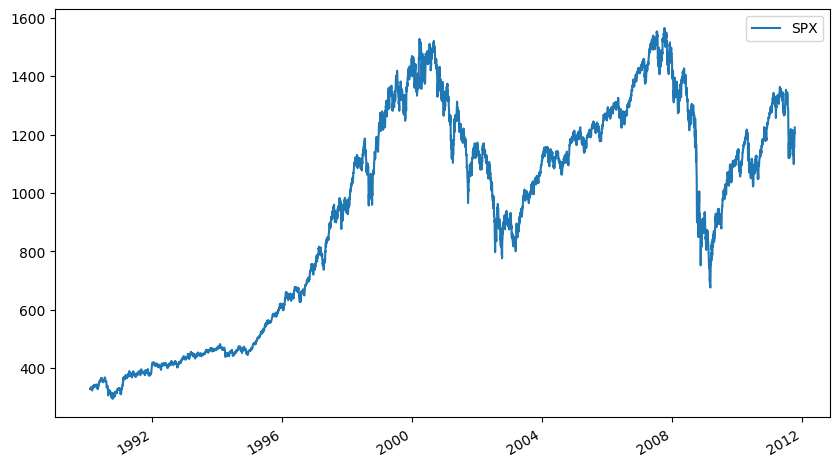

In [55]:
data.plot()

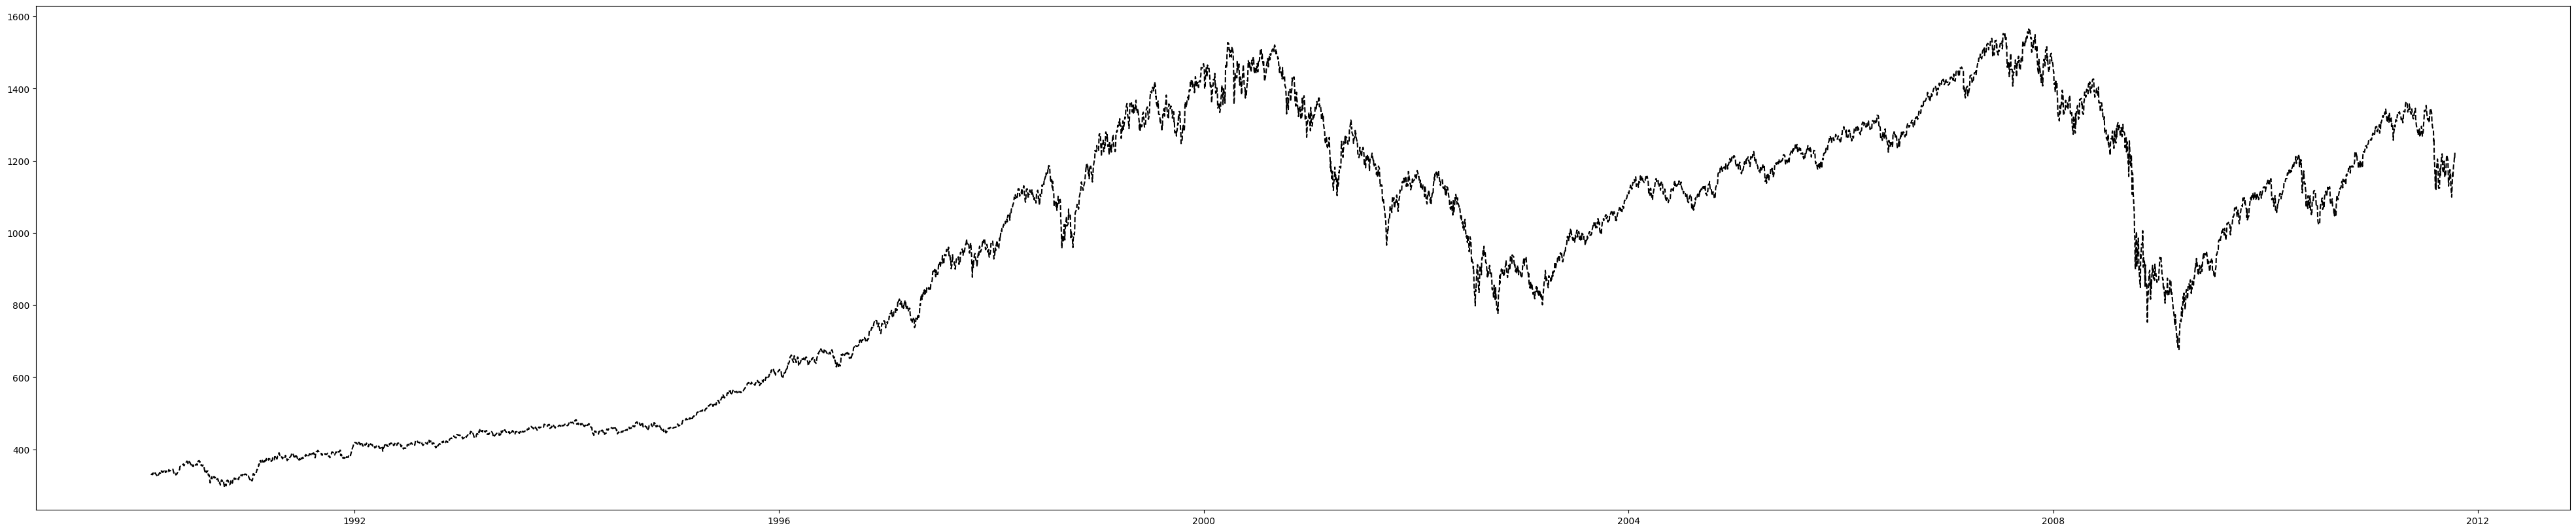

In [65]:
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(1,1,1)
ax.plot(data["SPX"],"k--")

- 위 데이터를 그래프로 나타내 보자

In [10]:
from datetime import datetime

In [11]:
crisis_data = [(datetime(2007,10,11), "Peak of bull market"),
          (datetime(2008,3,12), "Bear Stearns Fails"),
          (datetime(2008,9,15), "Lehman Bankruptcy")]

2007-2008년 세계적 금융위기 지점을 아래 내용으로 그래프에 주석으로 추가해보자.

- 2007년 10월 11일: 주가 강세장 위치 'Peak of bull market'
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴 'Bear Stearns Fails'
- 2008년 9월 15일: 레만 투자은행 파산 'Lehman Bankruptcy'

#### `annotate()`

- `xt` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

In [17]:
spx.asof(date)

1192.7

In [15]:
spx = data.SPX

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

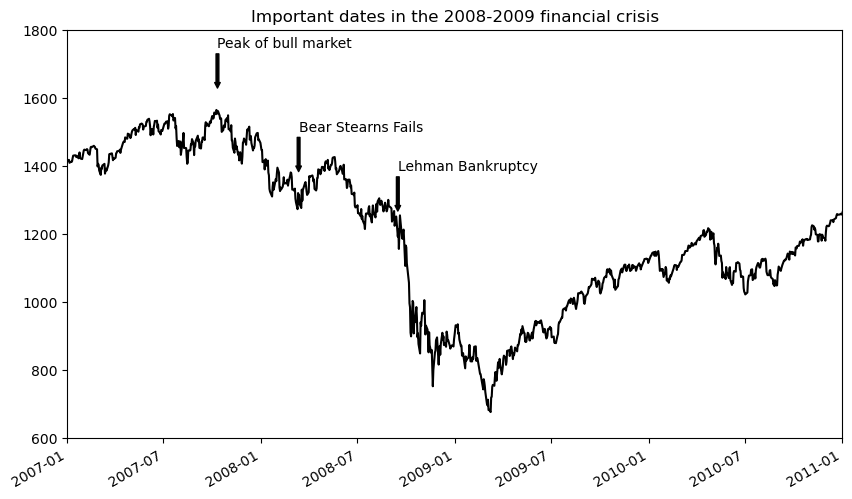

In [16]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

for date, label in crisis_data: #(datetime(2007,10,11), "Peak of bull market") 이 값의 앞부분이 date, 뒤에가 label로 나뉘어서 들어감
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225), #text 입력할때도 포인트에서 255떨어진 위치에 쓰인다.
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010 사이로 확대
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### 도형 추가

지정된 함수를 이용하여 다양한 도형을 추가 가능

- `plt.<도형명>((위치), 크기)`
- `plt.Rectangle()`: 직사각형. 왼편 아래 좌표 및 가로 세로 길이
- `plt.Circle()`: 원. 원의 중심 좌표 및 반지름.
- `plt.Polygon()`: 다각형. 각 꼭지점의 좌표.

__주의사항:__
- x, y축의 눈금이 다르면 도형이 정확하게 표현되지 않을 수 있다. 
- 예를 들어, 두 축의 척도가 다르면 원이 타원으로 보일수 있음
    - `Figure` 객체를 생성할 때 두 축의 크기를 동일하게 지정하면 척도가 동일해 진다. 

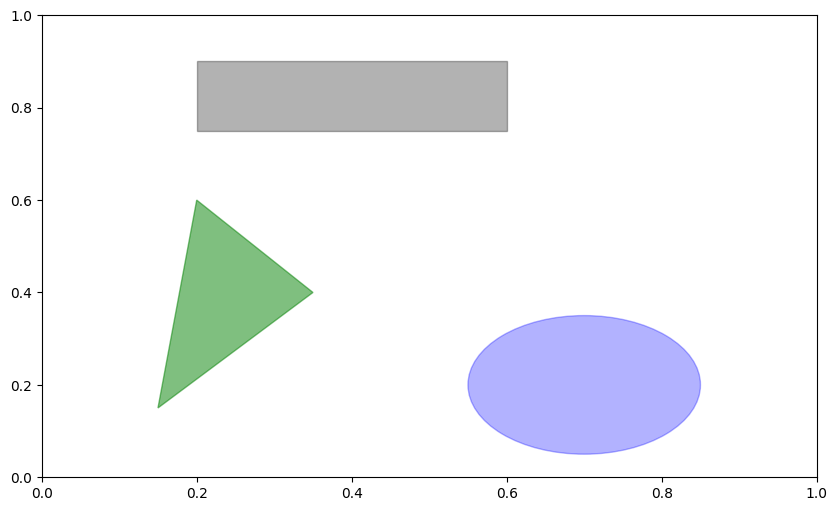

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

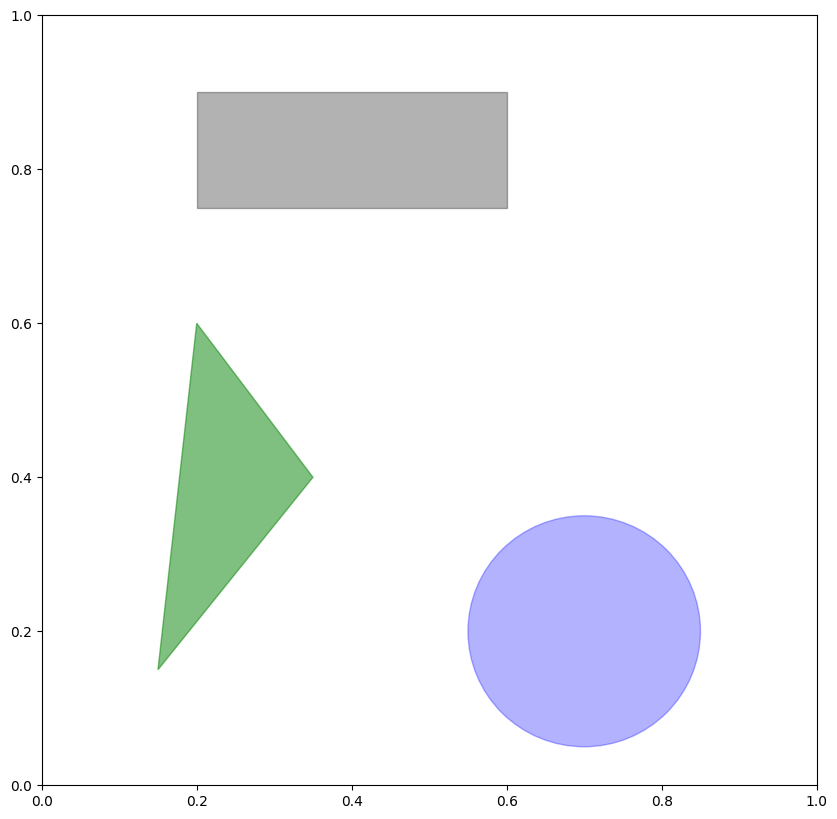

In [76]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

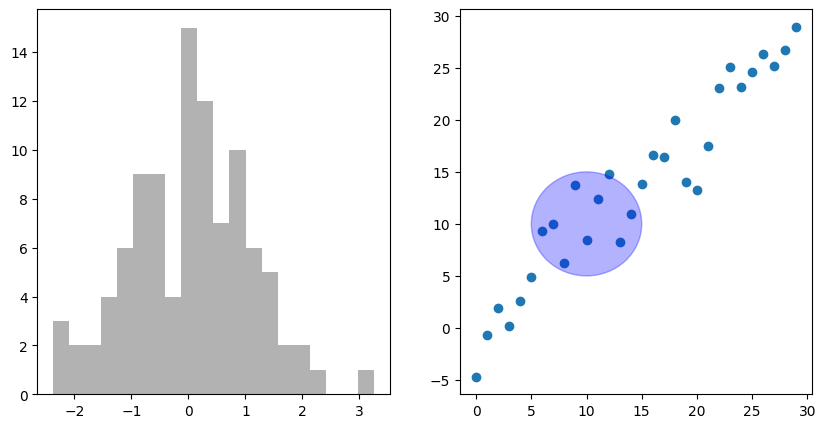

In [77]:
np.random.seed(12345)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
circ = plt.Circle((10, 10), 5, color='b', alpha=0.3)
ax2.add_patch(circ)
    

plt.show()

### 그래프 저장하기

`plt.savefig()`

- `dpi=100`: 인치당 픽셀 수. 저장된 이미지의 해상도 지정.
- `bbox_inches=tight`: 이미지별 둘레의 공백 지정. 여기서는 공백을 거의 사용하지 말라는 의미임.

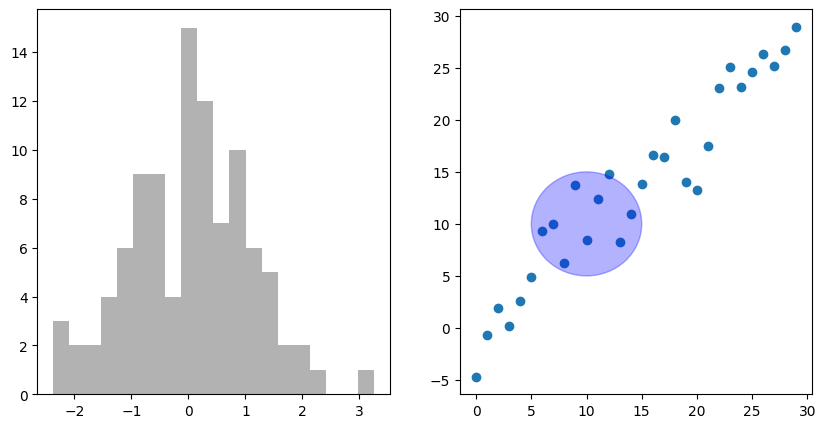

In [79]:
np.random.seed(12345)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
circ = plt.Circle((10, 10), 5, color='b', alpha=0.3)
ax2.add_patch(circ)

# 이 중간에 plt.show()를 하면 저장이 아예 흰 바탕으로 저장됨

plt.savefig("figpath.png",dpi=300) #600이 화질이 좋다

### matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 이미지의 사이즈를 지정한다.

In [34]:
plt.rc('figure', figsize=(10, 10))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [81]:
plt.rc("figure",figsize=(10,6))

* 선 속성 지정

In [82]:
plt.rc("lines", linewidth=2, color="b")

* 텍스트 폰트 속성 지정

In [83]:
plt.rc("font", family ="monospace", size = "10")

* 그래프 구성 요소의 색상 지정

In [87]:
plt.rcParams["text.color"]="red"
plt.rcParams["xtick.color"]="blue"
plt.rcParams["ytick.color"]="purple"

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

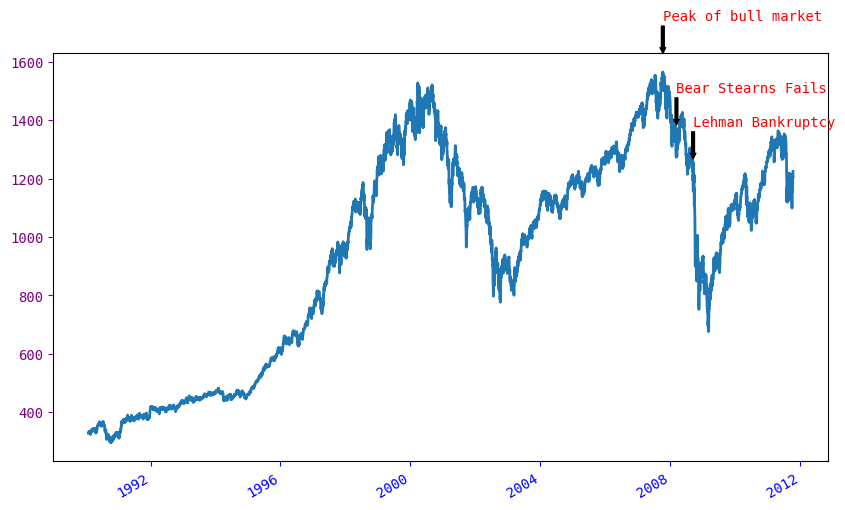

In [88]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='-')

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

plt.show()